In [1]:
import pandas as pd

df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [2]:
df.shape

(1470, 35)

In [3]:
df['Attrition'].value_counts()


,count
Attrition,
No,1233
Yes,237


In [4]:
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})
df['Attrition'].value_counts()

,count
Attrition,
0,1233
1,237


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   int64 
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [6]:
df.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis=1, inplace=True)

df.shape

(1470, 31)

In [7]:
df.select_dtypes(include='object').columns

Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'OverTime'],
      dtype='object')

In [8]:
df['OverTime'].value_counts()


,count
OverTime,
No,1054
Yes,416


In [9]:
df['OverTime'] = df['OverTime'].map({'Yes': 1, 'No': 0})
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})

In [10]:
df.select_dtypes(include='object').columns

Index(['BusinessTravel', 'Department', 'EducationField', 'JobRole',
       'MaritalStatus'],
      dtype='object')

In [11]:
df = pd.get_dummies(df, drop_first=True)
df.shape

(1470, 45)

In [12]:
X = df.drop('Attrition', axis=1)
y = df['Attrition']

X.shape, y.shape

((1470, 44), (1470,))

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

X_train.shape, X_test.shape


((1176, 44), (294, 44))

In [14]:
X_train.shape, X_test.shape


((1176, 44), (294, 44))

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


LOGISTIC REGRESSION MODEL

In [16]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(max_iter=1000)

log_model.fit(X_train_scaled, y_train)

y_pred_log = log_model.predict(X_test_scaled)

In [17]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_log))
print("\nClassification Report:\n", classification_report(y_test, y_pred_log))

Accuracy: 0.8605442176870748

Confusion Matrix:
 [[237  10]
 [ 31  16]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92       247
           1       0.62      0.34      0.44        47

    accuracy                           0.86       294
   macro avg       0.75      0.65      0.68       294
weighted avg       0.84      0.86      0.84       294



Logistic Regression provided interpretable results through feature coefficients and gave a strong baseline performance.

DECISION TREE MODEL


In [18]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))

Accuracy: 0.7585034013605442

Confusion Matrix:
 [[206  41]
 [ 30  17]]

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.83      0.85       247
           1       0.29      0.36      0.32        47

    accuracy                           0.76       294
   macro avg       0.58      0.60      0.59       294
weighted avg       0.78      0.76      0.77       294



Although Decision Tree handled non-linear patterns, it was less stable and prone to overfitting.

RANDOM FOREST MODEL

In [19]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

Accuracy: 0.826530612244898

Confusion Matrix:
 [[240   7]
 [ 44   3]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.97      0.90       247
           1       0.30      0.06      0.11        47

    accuracy                           0.83       294
   macro avg       0.57      0.52      0.50       294
weighted avg       0.76      0.83      0.78       294



Random Forest improved robustness but did not significantly outperform Logistic Regression in detecting employees who are likely to leave.

IMPROVED LOGISTIC REGRESSION MODEL

In [20]:
log_model_bal = LogisticRegression(max_iter=1000, class_weight='balanced')

log_model_bal.fit(X_train_scaled, y_train)

y_pred_log_bal = log_model_bal.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred_log_bal))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_log_bal))
print("\nClassification Report:\n", classification_report(y_test, y_pred_log_bal))

Accuracy: 0.7517006802721088

Confusion Matrix:
 [[192  55]
 [ 18  29]]

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.78      0.84       247
           1       0.35      0.62      0.44        47

    accuracy                           0.75       294
   macro avg       0.63      0.70      0.64       294
weighted avg       0.82      0.75      0.78       294



Balanced Logistic Regression improved minority class detection and became more suitable for real-world HR decision-making.

IMPROVED DECISION TREES MODEL

In [22]:
dt_model_bal = DecisionTreeClassifier(
    random_state=42,
    class_weight='balanced',
    max_depth=5
)

dt_model_bal.fit(X_train, y_train)

y_pred_dt_bal = dt_model_bal.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_dt_bal))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_dt_bal))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt_bal))

Accuracy: 0.7721088435374149

Confusion Matrix:
 [[202  45]
 [ 22  25]]

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.82      0.86       247
           1       0.36      0.53      0.43        47

    accuracy                           0.77       294
   macro avg       0.63      0.67      0.64       294
weighted avg       0.81      0.77      0.79       294



Tuning improved performance but did not outperform Balanced Logistic Regression.

IMPROVED RANDOM FOREST MODEL

In [23]:
rf_model_bal = RandomForestClassifier(
    random_state=42,
    class_weight='balanced',
    n_estimators=200,
    max_depth=8
)

rf_model_bal.fit(X_train, y_train)

y_pred_rf_bal = rf_model_bal.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_rf_bal))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf_bal))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf_bal))

Accuracy: 0.8197278911564626

Confusion Matrix:
 [[235  12]
 [ 41   6]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.95      0.90       247
           1       0.33      0.13      0.18        47

    accuracy                           0.82       294
   macro avg       0.59      0.54      0.54       294
weighted avg       0.77      0.82      0.78       294



Improved Random Forest performed strongly, but Balanced Logistic Regression still provided better interpretability and competitive recall, making it more suitable for business use.


# FINAL MODEL SELECTION


Among all the implemented models — Logistic Regression, Decision Tree, and Random Forest — Balanced Logistic Regression performed the best in terms of recall and AUC score.

Balanced Logistic Regression achieved the highest recall while maintaining a good balance between precision and accuracy. Therefore, it was selected as the final model for predicting employee attrition.

ROC CURVE PLOTING

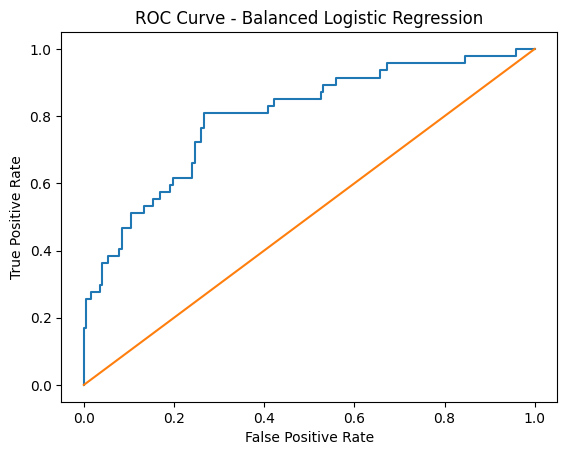

AUC Score: 0.7982599707123783


In [24]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_prob_log_bal = log_model_bal.predict_proba(X_test_scaled)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob_log_bal)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Balanced Logistic Regression")
plt.show()

print("AUC Score:", roc_auc)

FEATURES AFFECTING ATTRITION

In [25]:
import pandas as pd

coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': log_model_bal.coef_[0]
})

coefficients = coefficients.sort_values(by='Coefficient', ascending=False)

coefficients.head(10)

,Feature,Coefficient
35,JobRole_Laboratory Technician,0.810172
13,OverTime,0.771095
25,BusinessTravel_Travel_Frequently,0.722538
8,JobLevel,0.650173
41,JobRole_Sales Representative,0.531090
26,BusinessTravel_Travel_Rarely,0.512780
23,YearsSinceLastPromotion,0.499063
28,Department_Sales,0.470587
12,NumCompaniesWorked,0.464327
43,MaritalStatus_Single,0.455366


In [26]:
coefficients.tail(10)

,Feature,Coefficient
0,Age,-0.266981
7,JobInvolvement,-0.285370
38,JobRole_Research Director,-0.388326
32,EducationField_Other,-0.389932
9,JobSatisfaction,-0.393219
4,EnvironmentSatisfaction,-0.434370
31,EducationField_Medical,-0.452134
24,YearsWithCurrManager,-0.461322
29,EducationField_Life Sciences,-0.512319
18,TotalWorkingYears,-0.660270


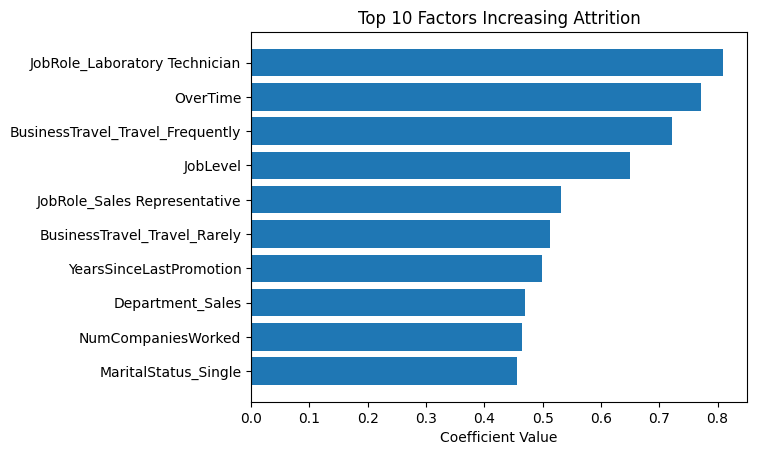

In [27]:
import matplotlib.pyplot as plt
import numpy as np

top_features = coefficients.sort_values(by='Coefficient', ascending=False).head(10)

plt.figure()
plt.barh(top_features['Feature'], top_features['Coefficient'])
plt.xlabel("Coefficient Value")
plt.title("Top 10 Factors Increasing Attrition")
plt.gca().invert_yaxis()
plt.show()

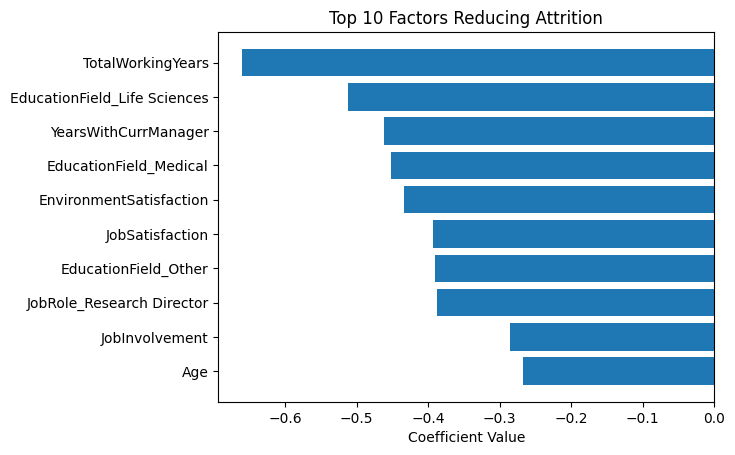

In [28]:
bottom_features = coefficients.sort_values(by='Coefficient').head(10)

plt.figure()
plt.barh(bottom_features['Feature'], bottom_features['Coefficient'])
plt.xlabel("Coefficient Value")
plt.title("Top 10 Factors Reducing Attrition")
plt.gca().invert_yaxis()
plt.show()

# C0NCLUSION


In this project, we built a Machine Learning model to predict whether an employee is likely to leave the company.

We cleaned the data, converted categorical values into numbers, handled the class imbalance problem, and trained three models: Logistic Regression, Decision Tree, and Random Forest.

After comparing all models, Balanced Logistic Regression performed the best in identifying employees who are likely to leave. Since detecting at-risk employees is more important than just overall accuracy, this model was selected as the final model.

The results also showed that factors like total working experience, job satisfaction, relationship with the manager, and work environment play an important role in reducing employee attrition.

This model can help HR teams identify employees who might leave and take necessary steps to improve employee retention.